# Matching

Prof. Daniel de Abreu Pereira Uhr

## Conteúdo

* Causalidade
  * Revisão Breve dos "Directed Acyclic Graphs" (DAGs)
  * Selection Bias em Variáveis Observáveis
  
* Matching (Correspondência)
  * Correspondência Exata
  * Correspondência Aproximada
  * Hipóteses de Identificação para o Matching
    * Mahalanobis Distance Matching (MDM)
    * Propensity Score Matching (PSM)
    * MDM ou PSM?
    * Propensity Score Weighting (PSW/IPTW)
* Aplicação na Literatura
* Aplicação em Python para Tratamento Binário
  * PSM
  * MDM
  * PSW
* E se o tratamento for contínuo?
  * Generalized Propensity Score (GPS)
  * Targeted Maximum Likelihood Estimation (TMLE)
  * Breve comparação entre GPS e TMLE
* Aplicação em Python para Tratamento Contínuo

## Referências

* Morgan, S. L., & Winship, C. (2014). Counterfactuals and causal inference: Methods and principles for social research. Cambridge University Press. Capítulo 3.
* Cunningham, S. W. (2013). Causal inference: The mixtape. https://www.scunning.com/mixtape.html
* Pearl, J. (2000). Causality: Models, reasoning, and inference. Cambridge University Press.
* Joshua D. Angrist and Jörn-Steffen Pischke (2009). Mostly Harmless Econometrics: An Empiricist's Companion. Princeton University Press.
* Hirano, K and Imbens, G. (2004). The Propensity Score with Continuous Treatments. In Applied Bayesian Modeling and Causal Inference from Incomplete-Data Perspectives, Andrew Gelman and Xiao-Li Meng (eds.), Wiley, New York.
* Kennedy EH, Ma Z, McHugh MD, Small DS. Nonparametric methods for doubly robust estimation of continuous treatment effects. Journal of the Royal Statistical Society, Series B. 79(4), 2017, pp.1229-1245.
* Moodie E and Stephens DA. Estimation of dose–response functions for longitudinal data using the generalised propensity score. In: Statistical Methods in Medical Research 21(2), 2010, pp.149–166.
* van der Laan MJ and Gruber S. Collaborative double robust penalized targeted maximum likelihood estimation. In: The International Journal of Biostatistics 6(1), 2010.
* van der Laan MJ and Rubin D. Targeted maximum likelihood learning. In: ​U.C. Berkeley Division of Biostatistics Working Paper Series, 2006.
* Marques, M. L. V.; Uhr, D. A. P.; Benevit, B.; Uhr, J. G. Z. An analysis of the relationship between rental housing and adoption of self-generating energy sources in Brazil using matching methodology. Journal of International Development, v. 36, p. 1570-1592, 2024.

## Causalidade

### Revisão Breve dos "Directed Acyclic Graphs" (DAGs)

O DAG é uma ferramenta gráfica que permite representar as relações causais entre variáveis. O DAG é uma representação gráfica de um conjunto de equações estruturais. O DAG é acíclico, ou seja, não possui ciclos. O DAG é uma ferramenta poderosa para identificar relações causais.

Vamos supor que queremos avaliar o efeito de uma variável $D$ sobre uma variável $Y$. Entretanto, outra variável $X$ afeta a decisão de $D$ e também afeta $Y$. Neste caso, $X$ é uma variável de confusão (*Confounding Variable*). O DAG é uma ferramenta que permite visualizar as relações causais entre as variáveis. Vejamos:

In [ ]:
# Importando o pacote para fazer a visualização do grafo
import graphviz as gr

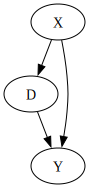

In [1]:
# Grafo indicando a variável de tratamento D, e um confounding X, e a variável de resultado Y
g = gr.Digraph()
g.edge("D", "Y")
g.edge("X", "D")
g.edge("X", "Y")
g

Agora vamos supor que queremos avaliar o efeito de uma variável $D$ sobre uma variável $Y$. Entretanto, outra variável $U$ não observável pelo pesquisador afeta a decisão de $D$ e também afeta $Y$. Neste caso, $U$ também uma variável de confusão (*Confounding Variable*) não observável. Novamente, o DAG é uma ferramenta que permite visualizar as relações causais entre as variáveis. Vejamos:

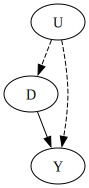

In [2]:
# Grafo indicando a variável de tratamento D, e um confounding U, e a variável de resultado Y
g = gr.Digraph()
g.edge("D", "Y")
g.edge("U", "D", style="dashed")
g.edge("U", "Y", style="dashed")
g

O viés de **seleção pelo tratamento é uma forma específica de viés de seleção** que ocorre em estudos ou experimentos nos quais a seleção dos participantes está relacionada ao tratamento que estão recebendo. Isso pode distorcer as conclusões e interpretações dos resultados, especialmente em estudos de causalidade e intervenções.

* **Autoseleção no Tratamento**: Os indivíduos podem optar por participar ou aderir a um determinado tratamento com base em suas características ou preferências pessoais. Ou seja, os participantes que optam por aderir ao tratamento podem ter características diferentes daqueles que optam por não aderir. Isso pode levar a uma amostra de tratamento que não é representativa da população em geral.
  
* **Viés de desistência** (Atrito): Quando os participantes desistem ou abandonam um tratamento antes da conclusão do estudo, isso pode introduzir um viés, especialmente se a desistência estiver relacionada à eficácia ou tolerabilidade do tratamento.


**Definições adicionais importantes**

* **Tratamento "Não Ignorável" (Non-Ignorable Treatment)**: Um tratamento é considerado "não ignorável" quando a associação entre o tratamento e o resultado não pode ser controlada ou ajustada apenas pelas variáveis observadas. Nesses casos, há a **presença de confundimento não observado** ou variáveis latentes que afetam tanto a seleção do tratamento quanto o resultado, e não podem ser ignorados ao estimar o efeito causal. 

* **Tratamento "Ignorável" (Ignorable Treatment)**: Um tratamento é considerado "ignorável" se a associação entre o tratamento (a variável de exposição) e o resultado (a variável de interesse) pode ser adequadamente controlada ou ajustada por meio de outras variáveis observadas. Em outras palavras, se as condições de ignorabilidade são satisfeitas, podemos confiar nas estimativas dos efeitos causais mesmo sem observar todas as variáveis relevantes. Isso é fundamental para a inferência causal em estudos observacionais.

### Selection Bias em Variáveis Observáveis

Pelos exemplos de DAGs vistos anteriormente, podemos perceber que a seleção de tratamento pode ser influenciada por variáveis observáveis e não observáveis. Nestes casos, a seleção pela realização do tratamento é endógena e decore de duas situações:

* **Seleção em Observáveis (Selection on Observables):** A seleção em observáveis refere-se à situação em que a seleção das unidades para um tratamento ($D$) é influenciada por variáveis observáveis ($X$). Em outras palavras, as características ou atributos conhecidos das unidades afetam a probabilidade de serem selecionadas para receber o tratamento. Nesse cenário, é possível controlar o viés resultante ao levar em consideração e ajustar as diferenças nas características observáveis entre os grupos de tratamento e controle. Em outras palavras, os componentes observáveis influenciam a seleção para o tratamento (auto-seleção) e o resultado ($Y$).

* **Seleção em Não-Observáveis (Selection on Unobservables):** A seleção em não-observáveis ocorre quando a seleção das unidades para o tratamento é influenciada por variáveis não observadas que não estão disponíveis para o pesquisador. Essas variáveis não observadas podem estar correlacionadas tanto com a seleção para o tratamento quanto com o resultado, levando a um viés não observável. Em outras palavras, algum(s) componente(s) do termo não observado ($U$) influencia tanto a seleção para o tratamento (auto-seleção) quanto o resultado ($Y$). Nesse cenário, não é possível controlar o viés resultante, mesmo que todas as variáveis observáveis sejam levadas em consideração e ajustadas.

Nessa aula vamos assumir a hipótese de **seleção em observáveis**. E vamos discutir estratégias para controlar o viés de seleção em variáveis observáveis.

## Matching (Correspondência)

Partimos do pressuposto que a seleção para o tratamento é endógena e que a seleção é influenciada por variáveis observáveis. Ou seja, a probabilidade da adoção pelo tratamento é afetada pelas variáveis observáveis do indivíduo. 

Uma estratégia natural para lidar com esse problema é estimar a regressão linear com OLS e considerar as covariáveis no modelo. Outra possibilidade intuitiva é a **correspondência** (*Matching*). A ideia é comparar unidades tratadas e não tratadas que são semelhantes em termos de características observáveis. Ou seja, para cada unidade tratada, procuramos uma unidade não tratada que seja semelhante em termos de características observáveis.

### Correspondência Exata

A correspondência exata é uma estratégia de correspondência que consiste em comparar unidades tratadas e não tratadas que são idênticas em termos de características observáveis. Ou seja, para cada unidade tratada, procuramos uma unidade não tratada que seja idêntica em termos de características observáveis.

Um estimador de correspondência simples é o seguinte:

$$ \widehat{\delta_{ATT}} = \frac{1}{N_{T}} \sum_{D_{i}=1}(Y_{i}-Y_{j(i)}) $$

onde $Y_{j(i)} $ é o $j$-ésima unidade correspondente à $i$-ésima unidade baseada no $j$ estando “mais próximo” do $i$ a unidade para algumas covariáveis $X$.

A ideia é encotrar entre os não tratados, uma unidade com as mesmas características X que o $i$ tratados, e imputar o indivíduo $j$ como contrafactual para o indivíduo $i$ tratado.

### Correspondência Aproximada

**E se houver mais de uma unidade "mais próxima" de $i$?**

Uma opção é simplesmente calcular a média do valor do resultado (Y) dessas duas unidades. Então, supondo que encontramos $M$ unidades "mais próximas", atribuiríamos o resultado médio como contrafactual para a unidade tratada do grupo de tratamento. Pela notação:

$$ \widehat{\delta_{ATT}} = \frac{1}{N_{T}} \sum_{D_{i}=1} \left ( Y_{i} - \left [ \frac{1}{M} \sum_{m=1}^{M}Y_{j_{m}(i)}\right ] \right ) $$

Este estimador realmente não é muito diferente daquele anterior; a principal diferença é que este calcula a média de várias variáveis de resutado possíveis, em vez de apenas escolher uma. Esta abordagem funciona bem quando podemos encontrar um número de boas correspondências para cada unidade do grupo de tratamento. 

**Exemplo**

A tabela mostra dois exemplos: uma lista de participantes num programa de formação profissional e uma lista de não participantes ou não estagiários. O grupo da esquerda é o grupo de tratamento e o grupo da direita é o grupo de controle. O algoritmo de correspondência que definimos anteriormente criará um terceiro grupo denominado amostra correspondente , consistindo no contrafactual correspondente de cada unidade do grupo de tratamento.

* Grupo 1: Estagiários (10 unidades)
* Grupo 2: Não estagiários (20 unidades)
* Amostra Correspondida


| Unidade 1 | Idade 1 | Ganhos 1 | Unidade 2 | Idade 2 | Ganhos 2 | Unidade Corresp. | Idade Corresp. | Ganhos Corresp. |
| ------- | ----- | ------ | ------- | ----- | ------ | ------- | ----- | ------ |
| 1       | 18    | 9500   | 1       | 20    | 8500   | 14      | 18    | 8050   |
| 2       | 29    | 12250  | 2       | 27    | 10075  | 6       | 29    | 10525  |
| 3       | 24    | 11000  | 3       | 21    | 8725   | 9       | 24    | 9400   |
| 4       | 27    | 11750  | 4       | 39    | 12775  | 8       | 27    | 10075  |
| 5       | 33    | 13250  | 5       | 38    | 12550  | 11      | 33    | 11425  |
| 6       | 22    | 10500  | 6       | 29    | 10525  | 13      | 22    | 8950   |
| 7       | 19    | 9750   | 7       | 39    | 12775  | 17      | 19    | 8275   |
| 8       | 20    | 10000  | 8       | 33    | 11425  | 1       | 20    | 8500   |
| 9       | 21    | 10250  | 9       | 24    | 9400   | 3       | 21    | 8725   |
| 10      | 30    | 12500  | 10      | 30    | 10750  | 10,18   | 30    | 9875   |
|         |       |        | 11      | 33    | 11425  |         |       |        |
|         |       |        | 12      | 36    | 12100  |         |       |        |
|         |       |        | 13      | 22    | 8950   |         |       |        |
|         |       |        | 14      | 18    | 8050   |         |       |        |
|         |       |        | 15      | 43    | 13675  |         |       |        |
|         |       |        | 16      | 39    | 12775  |         |       |        |
|         |       |        | 17      | 19    | 8275   |         |       |        |
|         |       |        | 18      | 30    | 9000   |         |       |        |
|         |       |        | 19      | 51    | 15475  |         |       |        |
|         |       |        | 20      | 48    | 14800  |         |       |        |
| Média | 24.3 | $11,075 | | 31.95 | $11,101.25 | | 24.3 | $9,380 |

**ATE**

Mas também podemos estimar o ATE. Mas observe que, ao estimar o ATE, **estamos preenchendo as unidades ausentes do grupo de controle, como antes, e as unidades ausentes do grupo de tratamento**. 

Se observação $i$ é tratado, em outras palavras, então precisamos preencher o que falta $Y_{i}^{0}$ usando as correspondências de controle, e se a observação $i$ é uma unidade de grupo de controle, então precisamos preencher o que falta $Y_{i}^{1}$ usando as correspondências do grupo de tratamento.

$$ \widehat{\delta_{ATE}} = \frac{1}{N} \sum_{i=1}^{N} (2 D_{i} - 1) \left [ Y_{i} - \left ( \frac{1}{M} \sum_{m=1}^{M}Y_{j_{m}(i) }\right ) \right ] $$

O termo $(2D_{i}-1)$ é um truque, quando $D_{i}=1$, então esse termo é um. quando $D_{i}=0$, então esse termo é -1. E os resultados invertem a ordem para que a observação do tratamento possa ser imputada.

### Hipóteses de Identificação para o Matching

Ao realizar o procedimento de correspondência, fazemos três suposições importantes. 

* Independência condicional (*unconfoundedness*, *ignorability*, ou *selection on observables*): 
$$ (Y^{1}, Y^{0}) \perp D | X$$

Ou seja, condicional nas covariáveis, a atribuição do tratamento é tão boa quanto um experimento aleatório. Essa é uma suposição forte, que tem maior probabilidade de ser verdadeira quando temos um grande número de covariáveis.

* Suporte Comum (sobreposição, common support):	
$$ 0  \leqslant  Pr(D=1|X)  \leqslant  1 $$

Ou seja, para cada valor de $X$, a probabilidade de tratamento deve estar entre 0 e 1. Nenhuma unidade é atribuída a um tratamento ou controle de forma determinística. Significa que, para cada valor de $X$, temos unidades tratadas e não tratadas. A figura a seguir mostra um exemplo possível de área de suporte comum.


<div style="text-align:center;">
    <img src="images\suportecomum.png"  alt="Imagem" style="width: 500px;"/>
</div>



* Valor de Tratamento Unitário Estável (SUTVA - Stable Unit Treatment Value Assumption):

$$ Y_{i}^{d} \perp D $$

Ou seja, o resultado potencial não depende do estado do tratamento. A configuração mais comum do SUTVA é violado quando há vazamento de tratamento, ou seja, quando o tratamento de uma unidade afeta o resultado de outra unidade (Efeitos de *spillover*, ou de rede).

#### Mahalanobis Distance Matching (MDM)

**Aumentando a dimensão de covariáveis**

A correspondência em uma única covariável é simples porque a distância é medida em termos dos próprios valores da covariável ($X$). Por exemplo, a distância em idade é simplesmente o quão perto em anos, meses ou dias uma pessoa está de outra pessoa. Mas e se tivermos várias covariáveis ​​necessárias para a correspondência? Digamos, idade e renda. Uma mudança de 1 ponto na idade é muito diferente de uma mudança de 1 ponto no logaritmo da renda, sem mencionar que agora estamos medindo a distância em duas, e não em uma, dimensões. Quando o número de covariáveis ​​correspondentes é maior que um, precisamos de uma nova definição de distância para medir a proximidade. 

**Distância Euclidiana**

Começamos com a medida de distância mais simples, a **distância euclidiana**.

$$ || X_{i} - X_{j} || = \sqrt{(X_{i}- X_{j})´(X_{i}- X_{j})} $$

$$ || X_{i} - X_{j} || = \sqrt{\sum_{k=1}^{K}(X_{i,k}- X_{j,k})^{2}} $$

O problema com esta medida de distância é que a própria medida de distância depende da escala das próprias variáveis. Por esta razão, os pesquisadores normalmente usarão alguma modificação da distância euclidiana, como a distância euclidiana normalizada , ou usarão uma distância alternativa totalmente diferente. 

**Distância Euclidiana Normalizada**

A distância euclidiana normalizada é uma distância comumente usada, e o que a torna diferente é que a distância de cada variável é dimensionada pela variância da variável. A distância é medida como:

$$ || X_{i} - X_{j} || = \sqrt{(X_{i}- X_{j})´ \hat{V}^{-1} (X_{i}- X_{j})} $$

onde 

$$ \hat{V}^{-1} = \left [ \begin{array}{ccc}
\hat{\sigma}_{1}^{2} & 0 & \dots & 0 \\
0 & \hat{\sigma}_{2}^{2} & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & \hat{\sigma}_{K}^{2} \\
\end{array} \right ] $$

Observe que a distância euclidiana normalizada é igual a:

$$ || X_{i} - X_{j} || = \sqrt{\sum_{k=1}^{K}\left ( \frac{X_{i,k}- X_{j,k}}{\hat{\sigma}_{k}^{2}} \right )} $$

Assim, se houver mudanças na escala de $X$, essas mudanças também afetam sua variância e, portanto, a distância euclidiana normalizada não muda.


**Distância de Mahalanobis**

Finalmente, existe a distância de Mahalanobis , que, como a medida de distância euclidiana normalizada, é uma métrica de distância invariante à escala. Isso é:

$$ || X_{i} - X_{j} || = \sqrt{(X_{i}- X_{j})´ \hat{\Sigma}_{X}^{-1} (X_{i}- X_{j})} $$

onde $\Sigma_{X}^{-1}$ é a matriz de covariância da amostra de $X$.

Basicamente, mais de uma covariável cria o problema da maldição da dimensionalidade, e, também torna a medição da distância mais difícil. Tudo isso cria alguns desafios para encontrar uma boa correspondência nos dados. Como você pode ver em cada uma dessas fórmulas de distância, às vezes haverá discrepâncias de correspondência.

Às vezes $ X_{i} \neq X_{j} $. O que isto significa? Isso significa que alguma unidade $i$ foi combinado com alguma unidade $j$ com base em um valor de covariável semelhante de $X=x$. Talvez unidade $i$ tem 25 anos, mas unidade $j$ tem 26 anos. A diferença é 1. Às vezes as discrepâncias são pequenas, às vezes zero, às vezes grandes. Mas, à medida que se afastam de zero, tornam-se mais problemáticos para a nossa estimativa e introduzem enviesamentos.

**Quanto maior a dimensão, maior a probabilidade de discrepâncias correspondentes e mais dados serão necessários. Então você pode levar isso ao banco – muito provavelmente, seu problema de correspondência requer um grande conjunto de dados para minimizar as discrepâncias de correspondência.**


**A Ideia do Estimador de Mahalanobis Distance Matching (MDM)**

O MDM funciona emparelhando unidades próximas com base em uma distância chamada distância de Mahalanobis, que você pode imaginar como uma distância euclidiana sem escala. 

Para que duas unidades tenham uma distância de Mahalanobis de 0, elas devem ter valores covariáveis ​​idênticos. Quanto mais diferentes os valores das covariáveis, maior a distância de Mahalanobis. 

A ideia é que, se você encontrar unidades de controle próximas às unidades tratadas na distância de Mahalanobis, cada par terá valores de covariáveis ​​semelhantes, e a distribuição das covariáveis ​​nos grupos de tratamento na amostra pareada será semelhante.



<div style="text-align:center;">
    <img src="images\maha1.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


<div style="text-align:center;">
    <img src="images\maha2.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


<div style="text-align:center;">
    <img src="images\maha3.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


<div style="text-align:center;">
    <img src="images\maha4.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


<div style="text-align:center;">
    <img src="images\maha5.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


#### Propensity Score Matching 

Existem várias maneiras de alcançar a estratégia de condicionamento implícita no critério backdoor, e discutimos várias delas. Mas um método popular foi desenvolvido por Donald Rubin em meados da década de 1970 até o início da década de 1980, chamado **método de escore de propensão** (*Propensity Score Matching* - Rubin 1977 ; Rosenbaum e Rubin 1983 ).

O escore de propensão é semelhante em muitos aspectos ao emparelhamento de covariáveis ​​do vizinho mais próximo de Abadie e Imbens (2006) e à subclassificação. É um método muito popular, especialmente nas ciências médicas, para abordar a seleção em observáveis, e também ganhou uso entre os economistas ( Dehejia e Wahba 2002 ) .

Apesar da excitação inicial causada por Dehejia e Wahba ( 2002 ) , o entusiasmo subsequente foi mais moderado ( Smith e Todd 2001 , 2005 ; King e Nielsen 2019 ). Como tal, a correspondência do escore de propensão não tem sido tão amplamente adotada entre os economistas como em outros métodos não experimentais, como a descontinuidade de regressão ou a diferença em diferenças. A razão mais comum apresentada para isto é que os economistas são muitas vezes céticos de que a CIA possa ser alcançada em qualquer conjunto de dados – quase como um artigo de fé. 

Isto ocorre porque, para muitas aplicações, os economistas, como grupo, **estão geralmente mais preocupados com a seleção de inobserváveis ​​do que com a seleção de observáveis** ​​e, como tal, recorrem a métodos de correspondência com menos frequência. Mas sou agnóstico quanto à questão de saber se a CIA detém ou não a sua aplicação específica. Não há razão teórica para rejeitar um procedimento concebido para estimar efeitos causais sobre algum princípio ad hoc que se sustenta devido a um palpite. 

Somente o conhecimento prévio e a profunda familiaridade com os detalhes institucionais da sua aplicação podem lhe dizer qual é a estratégia de identificação apropriada e, na medida em que o critério backdoor pode ser atendido, então os métodos de correspondência podem ser perfeitamente apropriados. E se não for possível, então a correspondência é inadequada. 

**Propensity Score**

O "escore de propensão" ou "índice de propensão" é a probabilidade de um indivíduo ser tratado, dado um conjunto de covariáveis. O escore de propensão é uma pontuação que resume as covariáveis ​​em um único número. A ideia é que, se você conhece o escore de propensão de um indivíduo, você conhece todas as informações relevantes sobre as covariáveis ​​que determinam a probabilidade de tratamento.


**Hipóteses de Identificação**

* Independência condicional (*unconfoundedness*, *ignorability*, ou *selection on observables*).
  * $(Y(0), Y(1)) \perp D_{i} | X_{i}$ não é testável. Como vimos anteriormente, a suposição de independência condicional significa simplesmente que o critério backdoor é atendido nos dados por meio do condicionamento em um vetor $X$.

* Suporte Comum (sobreposição, common support):	
  * $0 < Pr(D=1|X) < 1$ para todo $X$. Isto significa simplesmente que, para qualquer probabilidade, deve haver unidades tanto no grupo de tratamento como no grupo de controle.

* Valor de Tratamento Unitário Estável (SUTVA - Stable Unit Treatment Value Assumption):
  * $ Y_{i}^{d} \perp D $


A partir dessas suposições, obtemos o **teorema do escore de propensão**, que afirma que sob a CIA, 

$$(Y(0), Y(1)) \perp D_{i} | X_{i}$$

se a suposição de ignorabilidade forte for válida, é suficiente condicionar a análise à probabilidade de tratamento, o escore de propensão , para ter independência condicional:

$$(Y(0), Y(1)) \perp D_{i} | p(X)$$

onde $p(X)$ é o indice de propensão. Isso significa que para alcançar a independência, assumindo a CIA, basta condicionar no escore de propensão. O condicionamento no escore de propensão é suficiente para haver independência entre o tratamento e os resultados potenciais.

O resultado de Rosenbaum e Rubin (1983) é incrivelmente poderoso e prático, uma vez que o índice de propensão é uma variável unidimensional , enquanto $X$
pode ter muitas dimensões.

O teorema do escore de propensão diz que **você só precisa controlar as covariáveis ​​que determinam a probabilidade de uma unidade receber o tratamento**. Mas também diz algo mais do que isso. Tecnicamente, diz que a única covariável à qual você precisa condicionar é o índice de propensão. Todas as informações do $X$. A matriz foi resumida em um único número: o índice de propensão.

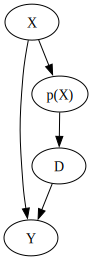

In [1]:
# Importando o pacote
import graphviz as gr

# Gráfico indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("D", "Y")
g.edge("p(X)", "D")
g.edge("X", "Y")
g.edge("X", "p(X)")
g

Então ao condicionarmos no escore de propensão fechamos um caminho de porta dos fundos e obtemos estimativas não enviesadas do efeito causal. Mas como podemos estimar o escore de propensão?

**A Ideia do Estimador de Correspondência pelo Escore de Propensão**

As versões de amostra do ATE e do ATT são obtidas por um procedimento de estimativa em duas etapas. Na primeira etapa, o pesquisador estima o escore de propensão usando logit ou probit. Na segunda etapa, o pesquisador utiliza a pontuação estimada para produzir versões amostrais de um dos estimadores médios do efeito do tratamento.

Podemos utilizar algumas estratégias a partir do escore de propensão:
* Aproximar os indivíduos do grupo de controle aos indivíduos do grupo de tratados.
* Aproximar apenas um indivíduo do grupo de controle para cada indivíduo do grupo de tratados.
* Utilizar o escore de propensão como um peso para estimar o ATT e o ATE (Propensity Score Weighting).



**Exemplo**


<div style="text-align:center;">
    <img src="images\psm1.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

<div style="text-align:center;">
    <img src="images\psm2.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

<div style="text-align:center;">
    <img src="images\psm3.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

<div style="text-align:center;">
    <img src="images\psm4.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

<div style="text-align:center;">
    <img src="images\psm5.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

<div style="text-align:center;">
    <img src="images\psm6.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

O PSM funciona emparelhando unidades que possuem escores de propensão semelhantes (probabilidades). 

Os escores de propensão reduzem toda a distribuição de covariáveis ​​em uma única dimensão; isso significa que duas unidades com escores de propensão semelhantes não necessariamente terão valores de covariáveis ​​semelhantes. 
No entanto, devido às propriedades teóricas de equilíbrio do escore de propensão, o PSM ainda pode produzir amostras equilibradas, mesmo que qualquer par de unidades combinadas individuais possa não ter valores covariáveis ​​semelhantes.

Segundo King e Nielsen (2019), o procedimento de escore de propensão aproximou a amostra observacional inicial à uma amostra randomizada.

**É importante notar que dependendo da métrica de aproximação do escore de propensão, temos uma redução maior ou menor na nossa base de dados.**

Existem várias métricas para limitar a redução da base de dados, como:
* Nearest Neighbor Matching (NN): É possível limitar a redução da base de dados ao escolher o número de vizinhos mais próximos que serão utilizados para a correspondência.
* Caliper Matching: É possível limitar a redução da base de dados ao escolher o caliper de correspondência. O caliper é uma restrição que impede que as unidades sejam emparelhadas se a diferença entre os escores de propensão for muito grande.
* Kernel Matching: É possível limitar a redução da base de dados ao escolher o tamanho da janela de kernel.
* Radius Matching: É possível limitar a redução da base de dados ao escolher o raio de correspondência.


Mesmo que a amostra de grupo de controle fosse muito superior aos tratados, o procedimento não garante que serão escolhidos os indivíduos com matching perfeito, entretanto será escolhida a amostra que aproxima à aleatorização.



**MDM vs PSM?**

King & Nielsen (2019) argumentam que o PSM pode produzir estimativas frágeis e não robustas que podem variar muito dependendo do modelo usado. 
Em particular, se você descartar progressivamente unidades que estão distantes umas das outras (ou seja, impondo um calibre cada vez mais apertado), eventualmente o equilíbrio começa a piorar com o PSM, mesmo que as unidades próximas no PS permaneçam. 
Eles chamam isso de paradoxo do propensity score, que é a motivação para recomendar métodos potencialmente mais robustos como MDM que aproximam diretamente no espaço de covariáveis. 

Então, devemos evitar o PSM e manter o MDM? 

Não. 

Rippolone et al. (2018) investigaram o impacto do paradoxo do propensity score em dados epidemiológicos reais. Eles descobriram que, embora o paradoxo ocorresse com alguns dados, não era problemático até que valores extremos de calibre fossem usados, muito além do que seria recomendado. 
O PSM geralmente rendeu bom equilíbrio nas covariáveis. Em contraste, o MDM produziu um equilíbrio ruim em um conjunto de dados, às vezes até pior com nenhuma correspondência.


### Propensity Score Weighting (IPTW)

Uma possibilidade para **não excluirmos os dados da amostra é repondera-la**. Podemos utilizar o escore de propensão como um peso, que aproxima a média do grupo de controle à média do grupo tratado. 

Isso se deve à suposição de não-confundimento. Logo, podemos reescrever o efeito médio do tratamento como:

$$ \beta_{ATE} = E[Y^{1} - Y^{0}|X=x] = E \left[ \frac{D_{i}}{p(X)}.Y_{i} - \frac{(1-D_{i})}{1-p(X)}.Y_{i} \right] $$


Observe que esta formulação do efeito médio do tratamento não depende dos resultados potenciais $Y_{i}^{1}$ e $Y_{i}^{0}$, mas apenas dos resultados observados $Y_{i}$ e do escore de propensão $p(X)$.

**Inverse Probability Weighting (IPW)**

Conforme visto anteriormente. é possivel entender que a função-peso (W) para estimar o ATE é dada por:

$$ W_{ATE} = \frac{D}{\hat{p}(X)} + \frac{1-D}{1-\hat{p}(X)} $$

A ideia é ponderar cada unidade do grupo de controle pelo inverso da probabilidade de não receber o tratamento, e cada unidade no grupo de tratamento pelo inverso da probabilidade de receber o tratamento. 

Já , para o ATT (**Inverse Probability of Treatment Weight - IPTW**), a função peso assume:

$$ W_{ATT} = D + (1-D)\frac{\hat{p}(X)}{1-\hat{p}(X)} $$


Lembre-se que estamos assumindo:
* Hipóteses: Seleção em observáveis, sobreposição e SUTVA.
* Ideia: Construir o contrafactual para os indivíduos tratados a partir da reponderação do grupo de controle pelo inverso da probabilidade de receber o tratamento. Ou seja, utilizando o escore de propensão como um peso.

## Aplicação na Literatura

Vejamos um artigo recente que aplica PSM: MARQUES, M. L. V. ; UHR, D. A. P. ; BENEVIT, B. ; UHR, J. G. Z. An analysis of the relationship between rental housing and adoption of self-generating energy sources in Brazil using matching methodology. **Journal of International Development**, v. 36, p. 1570-1592, 2024.

É importante verificar a estrutura de apresentação do artigo, como a metodologia e explorada, e posteriormente a apresentação dos resultados e estratégia de Robustez. Entendo que esse artigo é um ótimo modelo de como apresentar um estudo que utiliza o PSM.

<div style="text-align:center;">
    <img src="images\Artigo_PSM.png"  alt="Imagem" style="width: 500px;"/>
</div>




## Aplicação em Python para Tratamento Binário

### PSM

Vamos utilizar o Python, e entender um pouco sobre possíveis aplicações do PSM. Vamos utilizar nosso exemplo das gestantes que fumam e não fumam. A ideia é entender como o PSM pode ser utilizado para estimar o efeito do tratamento. As aplicações aqui não são exaustivas, e a ideia é apenas ilustrar como o PSM pode ser utilizado.




Vamos carregar o data frame e construir algumas variáveis para a análise.

In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from causalinference import CausalModel

In [57]:
# DataFrame
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")

# Criar a variável de resultado
df['Y'] = df['bweight']

# Crie a variável 'Treated' com valor inicial de 0
df['Treated'] = 0
# Recodifique 'Treated' para 1 se 'mbsmoke' for igual a 'smoker'
df.loc[df['mbsmoke'] == 'smoker', 'Treated'] = 1

df['casada'] = 0
df.loc[df['mmarried']=='married', 'casada'] = 1

# gerar uma variável de contagem de linhas iniciando em 1
df['id'] = np.arange(len(df)) + 1

# Conjunto de Covariáveis X
X = ['casada', 'mage', 'medu']

In [58]:
cm = CausalModel(
    Y=df["Y"].values, 
    D=df["Treated"].values, 
    X=df[['casada', 'mage', 'medu']].values
)

In [59]:
cm.est_via_ols(adj=1)
print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -219.323     22.438     -9.775      0.000   -263.302   -175.345



In [60]:
print(cm.summary_stats)


Summary Statistics

                      Controls (N_c=3778)         Treated (N_t=864)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y     3412.912      570.687     3137.660      560.893     -275.252

                      Controls (N_c=3778)         Treated (N_t=864)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.751        0.432        0.473        0.500       -0.595
             X1       26.810        5.645       25.167        5.301       -0.300
             X2       12.930        2.534       11.639        2.168       -0.547



**Propensity Score Matching** - nearest-neighborhood matching

* 'inv' (variância inversa): Especifica que a matriz de ponderação usada para calcular as distâncias é a inversa da matriz de covariância. Isso significa que variáveis com maior variância têm menor peso no cálculo da distância, e variáveis com menor variância têm maior peso.
* 1 (um match por tratado): Isso significa que cada indivíduo tratado será pareado com exatamente um indivíduo do grupo de controle (não tratado).
* Se definido como True, o método tentará ajustar o viés residual através de uma regressão linear adicional. Isso pode ser útil se houver preocupação de que o matching não tenha balanceado completamente as covariáveis entre os grupos tratado e controle.

In [61]:
# Estimates average treatment effects using nearest-neighborhood matching.
cm.est_via_matching(weights='inv', matches=1, bias_adj=False)
print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -219.323     22.438     -9.775      0.000   -263.302   -175.345

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -203.744     34.020     -5.989      0.000   -270.424   -137.064
           ATC   -199.569     37.967     -5.256      0.000   -273.984   -125.154
           ATT   -222.002     30.031     -7.393      0.000   -280.862   -163.142



* bias_adj=True: O método realiza um ajuste adicional após o matching para corrigir possíveis vieses remanescentes que surgem devido a essas diferenças residuais nas covariáveis.

In [62]:
# Estimates average treatment effects using 5 nearest-neighborhood matching.
cm.est_via_matching(weights='inv', matches=5, bias_adj=True)
print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -219.323     22.438     -9.775      0.000   -263.302   -175.345

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -219.043     28.612     -7.655      0.000   -275.123   -162.962
           ATC   -217.321     31.351     -6.932      0.000   -278.768   -155.874
           ATT   -226.572     25.105     -9.025      0.000   -275.777   -177.366



### Mahalanobis Matching

In [50]:
cm.est_via_matching(matches=1, weights='maha')
print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -219.323     22.438     -9.775      0.000   -263.302   -175.345

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -201.341     34.026     -5.917      0.000   -268.032   -134.651
           ATC   -196.748     37.985     -5.180      0.000   -271.199   -122.297
           ATT   -221.426     29.996     -7.382      0.000   -280.218   -162.633



### Propensity Score Weighting

**Inverse Probability of Treatment Weight (IPTW)**

In [52]:
# Estimar o escore de propensão com regressão logística
df['pscore'] = smf.logit("Treated ~ casada + mage + medu", data=df).fit().predict()

Optimization terminated successfully.
         Current function value: 0.446546
         Iterations 6


In [53]:
# Inverse Probability of Treatment Weight (IPTW)

# Peso para o efeito médio do tratamento (ATE)
df['W1'] = 1 / df['pscore']
df.loc[df['Treated'] == 0, 'W1'] = 0
df['W2'] = 1 / (1 - df['pscore'])
df.loc[df['Treated'] == 1, 'W2'] = 0

# Peso para o efeito médio do tratamento nos tratados (ATT)
df['W_ATE'] = df['W1'] + df['W2']
df['W_ATT'] = df['pscore'] / (1 - df['pscore'])
df.loc[df['Treated'] == 1, 'W_ATT'] = 1

In [54]:
# Aplicando regressão ponderada (IPTW) para ATE
model_ate = smf.wls("Y ~ Treated", data=df, weights=df['W_ATE']).fit()
print(model_ate.summary())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.040
Model:                            WLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     194.9
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           2.03e-43
Time:                        16:47:18   Log-Likelihood:                -36594.
No. Observations:                4642   AIC:                         7.319e+04
Df Residuals:                    4640   BIC:                         7.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3401.1645     11.754    289.358      0.0

ATE com peso IPTW apresentou efeito de -234.4371 gramas.

In [55]:
# Aplicando regressão ponderada (IPTW) para ATT
model_att = smf.wls("Y ~ Treated", data=df, weights=df['W_ATT']).fit()
print(model_att.summary())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.032
Model:                            WLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     155.8
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           3.41e-35
Time:                        16:47:29   Log-Likelihood:                -37060.
No. Observations:                4642   AIC:                         7.412e+04
Df Residuals:                    4640   BIC:                         7.414e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3350.9689     12.014    278.924      0.0

ATT com peso IPTW é -213.3092

## E se o tratamento for contínuo?

### Generalized Propensity Score - GPS

* Hirano K., and Imbens G.W.; The propensity score with continuous treatments. In: Gelman A and Meng XL (eds) Applied bayesian modeling and causal inference from incomplete-data perspectives. Oxford, UK: Wiley, 2004, pp.73–84.


O GPS pode ser entendido em duas etapas:

**Primeira Etapa: Estimação do GPS**

1. **Modelagem do Tratamento**: O tratamento $ T_i $ dado as covariáveis $ X_i $ é modelado como uma distribuição normal, $ T_i | X_i \sim N(\beta_0 + \beta_1X_i, \sigma^2) $. Isto significa que, condicional às covariáveis, o tratamento segue uma distribuição normal com média $ \beta_0 + \beta_1X_i $ e variância $ \sigma^2 $.

2. **Extensões do Modelo**: O modelo pode ser extendido para incluir misturas de normais ou distribuições normais heteroscedásticas, onde a variância é uma função paramétrica das covariáveis, oferecendo uma modelagem mais flexível e adequada à heterogeneidade dos dados.

3. **Estimação dos Parâmetros**: Os parâmetros $ \beta_0 $, $ \beta_1 $, e $ \sigma^2 $ são estimados pelo método de máxima verossimilhança.

4. **Cálculo do GPS Estimado**: O GPS estimado, $ \hat{R}_i $, é calculado usando a fórmula:
   $$
   \hat{R}_i = \frac{1}{\sqrt{2\pi \hat{\sigma}^2}} \exp\left(-\frac{1}{2\hat{\sigma}^2}(T_i - \hat{\beta}_0 - \hat{\beta}_1X_i)^2\right)
   $$
   Esse valor representa a densidade da probabilidade de $ T_i $ dado $ X_i $, ajustado pelos parâmetros estimados.

**Segunda Etapa: Modelagem do Resultado**

1. **Modelo de Expectativa Condicional**: A expectativa condicional do resultado $ Y_i $ dado $ T_i $ e $ R_i $ é modelada como uma função flexível dos dois argumentos. Por exemplo, pode-se usar uma aproximação quadrática:
   $$
   E[Y_i | T_i, R_i] = \alpha_0 + \alpha_1T_i + \alpha_2T_i^2 + \alpha_3R_i + \alpha_4R_i^2 + \alpha_5T_iR_i
   $$
   
2. **Estimação dos Parâmetros**: Os parâmetros $ \alpha_0, \alpha_1, \alpha_2, \alpha_3, \alpha_4, \alpha_5 $ são estimados usando o método de mínimos quadrados ordinários, utilizando o GPS estimado $ \hat{R}_i $.

**Estimativa do Efeito do Tratamento**

1. **Cálculo do Efeito Médio do Tratamento**: Para cada nível de tratamento $ t $, o efeito médio potencial $ E[Y(t)] $ é estimado como:
   $$
   E[Y(t)] = \frac{1}{N} \sum_{i=1}^{N} (\hat{\alpha}_0 + \hat{\alpha}_1t + \hat{\alpha}_2t^2 + \hat{\alpha}_3\hat{r}(t, X_i) + \hat{\alpha}_4\hat{r}(t, X_i)^2 + \hat{\alpha}_5t\hat{r}(t, X_i))
   $$
   Isso é feito para cada nível de tratamento de interesse, fornecendo uma estimativa da função de dose-resposta completa.

2. **Consistência e Normalidade Assintótica**: O modelo paramétrico usado para o GPS e a função de regressão demonstram consistência de raiz-N e normalidade assintótica para o estimador.

3. **Erro Padrão Assintótico e Intervalos de Confiança**: Embora o erro padrão assintótico possa ser calculado com expansões baseadas nas equações de estimação, na prática, muitas vezes é conveniente usar métodos de bootstrap para formar erros padrão e intervalos de confiança, considerando a estimação do GPS e dos parâmetros $ \alpha $.

Essa abordagem fornece uma forma robusta e flexível de avaliar o impacto de tratamentos contínuos, considerando a heterogeneidade das covariáveis e a complexidade dos efeitos do tratamento.

### Targeted Maximum Likelihood Estimation - TMLE 

Também chamado de método de Estimação de Máxima Verossimilhança Direcionada (Equivalence of IPTW, DR-IPTW, and targeted maximum likelihood estimators)

Para representar o modelo Targeted Maximum Likelihood Estimation (TMLE) em termos de equações, podemos seguir uma sequência de passos que refletem tanto a modelagem inicial quanto o processo de refinamento direcionado. Aqui está uma descrição passo a passo com as equações correspondentes:

#### Passo 1: Modelagem Inicial
Primeiro, modelamos a relação entre as covariáveis $ X $ e o tratamento $ T $ através de um modelo de regressão adequado, baseado na natureza de $ T $ (binário, contínuo, etc.). Por exemplo, podemos começar com:
$$ T_i \mid X_i \sim \text{Algum Modelo}( \beta_0, \beta_1, ..., \beta_p) $$
onde $ \beta $ são os parâmetros do modelo que descrevem como as covariáveis afetam o tratamento.

#### Passo 2: Estimação da Expectativa Condicional e Parâmetro Nuisance
Definimos a função $ Q_0(Y, T, X) $ como a expectativa condicional de $ Y $ dado $ T $ e $ X $, e a função $ g(T, X) $ que representa a probabilidade condicional de $ T $ dado $ X $:
$$ Q_0(Y, T, X) \equiv E(Y \mid T, X) $$
$$ g(T, X) \equiv P(T \mid X) $$

#### Passo 3: Ajuste Direcionado (Targeting)
A função $ Q_0 $ é ajustada para criar $ Q_1 $ usando uma função $ h(T, X) $, baseada na curva de influência eficiente do parâmetro de interesse. A função $ h $ é especificamente desenhada para ajustar $ Q_0 $ de modo a reduzir o viés na estimativa do parâmetro de interesse:
$$ Q_1(Y, T, X) = Q_0(Y, T, X) + \epsilon \cdot h(T, X) $$
onde $ \epsilon $ é um pequeno parâmetro escalado para garantir que o ajuste não seja excessivo, e $ h(T, X) $ é derivada a partir da curva de influência eficiente.

#### Passo 4: Estimativa do Parâmetro de Interesse
Finalmente, o estimador TMLE, $ \psi_{TMLE} $, é obtido calculando:
$$ \psi_{TMLE} = \frac{1}{n} \sum_{i=1}^n Q_1(Y_i, T_i, X_i) $$
Este é o resultado do processo TMLE que procura maximizar a verossimilhança do parâmetro de interesse minimizando seu viés e maximizando a eficiência estatística.

**Observações Importantes**

- **Função $ h(T, X) $**: A escolha de $ h(T, X) $ é crítica e deve ser tal que $ h $ reflita a direção na qual o viés do estimador original $ Q_0 $ pode ser reduzido. Isto é geralmente realizado pela inclusão da curva de influência eficiente na definição de $ h $.
- **Iterações e Convergência**: O processo pode ser iterativo, ajustando $ Q_0 $ a $ Q_1 $, $ Q_2 $, etc., até que a mudança no estimador seja mínima, indicando convergência para um estimador eficiente.


### Breve comparação entre GPS e TMLE

O GPS é uma extensão do método padrão da ferramenta de propensão e é essencialmente o tratamento densidade de atribuição calculada em um valor de tratamento específico (e covariável). Semelhante ao Na abordagem padrão do escore de propensão, a variável aleatória GPS é usada para equilibrar as covariáveis. No o núcleo desta ferramenta, modelos lineares generalizados são usados ​​para estimar o GPS, e generalizados modelos aditivos são usados ​​para estimar a curva causal final suavizada. Comparado com isso método TMLE do pacote, este método GPS é mais eficiente computacionalmente, mais adequado para grandes conjuntos de dados, mas produz intervalos de confiança significativamente mais amplos.

O método TMLE é baseado no trabalho de van der Laan sobre uma abordagem de inferência causal que empregaria abordagens poderosas de aprendizado de máquina para estimar um efeito causal (van der Laan & Gruber, 2010). TMLE envolve prever o resultado do tratamento e covariáveis usando um modelo de aprendizado de máquina e, em seguida, prevendo a atribuição de tratamento a partir das covariáveis. O TMLE também emprega uma etapa de “direcionamento” de substituição para corrigir o desequilíbrio de covariáveis ​​e para estimar um efeito causal imparcial.

Comparado com o método GPS do pacote, este método TMLE é duplamente robusto contra especificações incorretas de modelo, incorpora técnicas de aprendizado de máquina internamente, produz intervalos de confiança significativamente menores, no entanto, é menos eficiente computacionalmente.

## Aplicação em Python para Tratamento Contínuo

Kobrosly, R. W., (2020). causal-curve: A Python Causal Inference Package to Estimate Causal Dose-Response Curves. Journal of Open Source Software, 5(52), 2523. 
https://doi.org/10.21105/joss.02523

Instale o pacote: "pip install causal-curve"

O estimador permite:
* Generalized Propensity Score (GPS)
* Targetted Maximum Likelihood Estimation (TMLE)
* Causal mediation effects in presence of continuous mediator and treatment


Nesse exemplo, vamos continuar com a mesma base de dados anterior. Entretanto, vamos supor que a variável de tratamento agora é a idade do pai do bebê. Queremos verificar como o peso do bebê é afetado pela idade do pai (uma variável contínua). Esse exemplo serve apenas como ilustração da programaçãoo em Python.


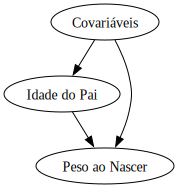

In [66]:
import graphviz as gr
g = gr.Digraph()
g.edge("Idade do Pai", "Peso ao Nascer")
g.edge("Covariáveis", "Idade do Pai")
g.edge("Covariáveis", "Peso ao Nascer")
g

In [67]:
from os.path import expanduser
import warnings; warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from causal_curve import GPS_Regressor
from causal_curve import Mediation

In [73]:
# Convertendo as colunas relevantes para float
df['fage'] = df['fage'].astype(float)
df['bweight'] = df['bweight'].astype(float)
df['fage'].describe()

count    4642.000000
mean       27.267126
std         9.354411
min         0.000000
25%        24.000000
50%        28.000000
75%        33.000000
max        60.000000
Name: fage, dtype: float64

In [77]:
df['fage'].value_counts()

30.0    296
0.0     294
31.0    280
28.0    279
29.0    278
27.0    269
26.0    267
32.0    250
33.0    222
25.0    216
24.0    212
34.0    187
23.0    184
22.0    168
35.0    155
21.0    132
36.0    132
20.0    115
37.0    102
19.0     88
38.0     76
18.0     73
39.0     59
40.0     50
41.0     42
17.0     39
42.0     32
16.0     22
44.0     20
46.0     16
43.0     15
45.0     15
47.0      9
48.0      9
49.0      7
51.0      7
50.0      7
15.0      5
53.0      3
14.0      2
58.0      2
60.0      2
55.0      1
54.0      1
52.0      1
56.0      1
Name: fage, dtype: int64

In [69]:
# Dicionário para armazenar os resultados do modelo
results_dict = {}

# potenciais variáveis de confusão
potential_confounders = ['casada', 'mage', 'medu']

# Ajuste do modelo GPS
gps = GPS_Regressor(gps_family='normal', lower_grid_constraint=0.0, upper_grid_constraint=0.99, n_splines=5, verbose=False)
gps.fit(
    T=df['fage'], 
    X=df[potential_confounders], 
    y=df['bweight']
)

# Armazenando os resultados
results_dict['GPS'] = gps.calculate_CDRC()

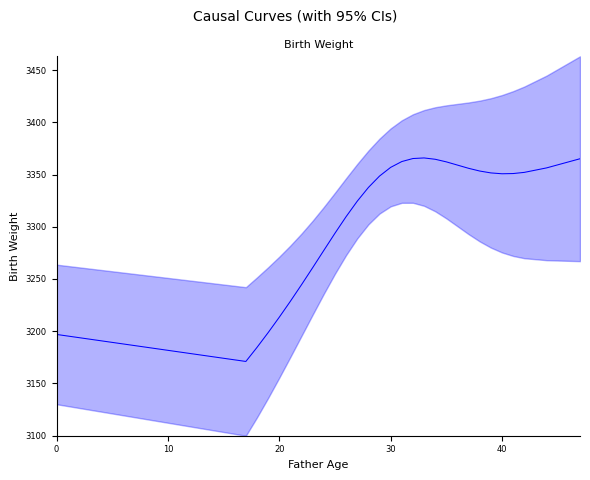

In [70]:
# Estrutura do gráfico (Resultado)
result_class = ['GPS']
result_name = ['Birth Weight']

def plot_mean_and_CI(ax, treatment, mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    ax.fill_between(treatment, lb, ub, color=color_shading, alpha=0.3)
    # plot the mean on top
    ax.plot(treatment, mean, color_mean, linewidth=0.75)

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [6, 5]

fig, ax = plt.subplots(1, 1)

# Plotting quantities
treat = results_dict[result_class[0]]['Treatment']
mean = results_dict[result_class[0]]['Causal_Dose_Response']
lb = results_dict[result_class[0]]['Lower_CI']
ub = results_dict[result_class[0]]['Upper_CI']
plot_mean_and_CI(ax, treat, mean, lb, ub, color_mean='b', color_shading='b')

# Labels
ax.set_ylabel('Birth Weight', fontsize=8)
ax.set_xlabel('Father Age', fontsize=8)
ax.set_title(result_name[0], fontsize=8)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim(treat.min(), treat.max())
ax.set_ylim(min(lb), max(ub))
ax.tick_params(axis='both', which='major', labelsize=6)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Causal Curves (with 95% CIs)", fontsize=10)
fig.savefig('test_causal_curves.png', bbox_inches='tight', dpi=200)
plt.show()

Vou adicionar o peso médio dos bebês para comparar com o resultado do modelo.

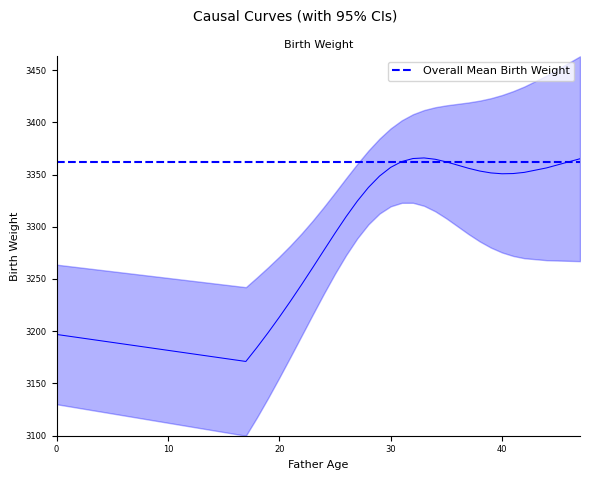

In [71]:
# Calculando o peso médio do bebê em toda a amostra
overall_mean_weight = df['bweight'].mean()

# Restante do código para plotar as curvas causais
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [6, 5]

fig, ax = plt.subplots(1, 1)

# Plotting quantities
treat = results_dict[result_class[0]]['Treatment']
mean = results_dict[result_class[0]]['Causal_Dose_Response']
lb = results_dict[result_class[0]]['Lower_CI']
ub = results_dict[result_class[0]]['Upper_CI']
plot_mean_and_CI(ax, treat, mean, lb, ub, color_mean='b', color_shading='b')

# Labels
ax.set_ylabel('Birth Weight', fontsize=8)
ax.set_xlabel('Father Age', fontsize=8)
ax.set_title(result_name[0], fontsize=8)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim(treat.min(), treat.max())
ax.set_ylim(min(lb), max(ub))
ax.tick_params(axis='both', which='major', labelsize=6)

# Adicionando a linha do peso médio do bebê ao gráfico
ax.axhline(y=overall_mean_weight, color='b', linestyle='--', label='Overall Mean Birth Weight')

# Adicionando a legenda ao gráfico
ax.legend(fontsize=8)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Causal Curves (with 95% CIs)", fontsize=10)
fig.savefig('test_causal_curves.png', bbox_inches='tight', dpi=200)
plt.show()


Vamos rodar o modelo Targetted Maximum Likelihood Estimation (TMLE). Entendo que pode ser utilizado como uma estratégia de robustez para o GPS.

In [74]:
from causal_curve import TMLE_Regressor

tmle = TMLE_Regressor(
    random_seed=111,
                bandwidth=10
)

tmle.fit(T = df['fage'], X = df[['casada', 'mage', 'medu']], y = df['bweight'])
gps_results = tmle.calculate_CDRC(0.95)

# Armazenando os resultados
results_dict['TMLE'] = tmle.calculate_CDRC(0.95)

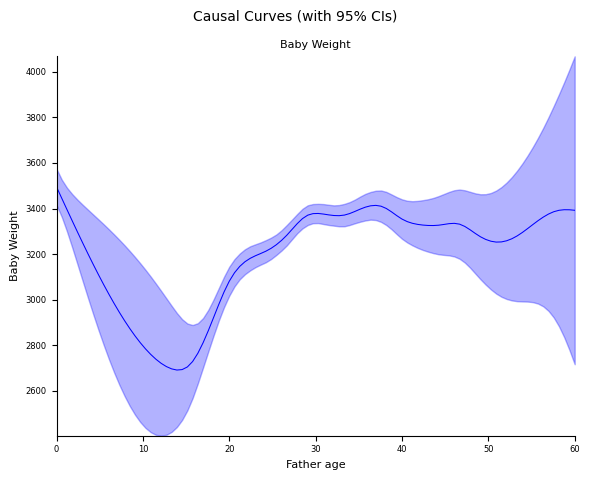

In [75]:
# Estrutura do gráfico (Resultado)
result_class = ['TMLE']
result_name = ['Baby Weight']

def plot_mean_and_CI(ax, treatment, mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    ax.fill_between(treatment, lb, ub, color=color_shading, alpha=0.3)
    # plot the mean on top
    ax.plot(treatment, mean, color_mean, linewidth=0.75)

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [6, 5]

fig, ax = plt.subplots(1, 1)

# Plotting quantities
treat = results_dict[result_class[0]]['Treatment']
mean = results_dict[result_class[0]]['Causal_Dose_Response']
lb = results_dict[result_class[0]]['Lower_CI']
ub = results_dict[result_class[0]]['Upper_CI']
plot_mean_and_CI(ax, treat, mean, lb, ub, color_mean='b', color_shading='b')

# Labels
ax.set_ylabel('Baby Weight', fontsize=8)
ax.set_xlabel('Father age', fontsize=8)
ax.set_title(result_name[0], fontsize=8)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim(treat.min(), treat.max())
ax.set_ylim(min(lb), max(ub))
ax.tick_params(axis='both', which='major', labelsize=6)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Causal Curves (with 95% CIs)", fontsize=10)
fig.savefig('test_causal_curves.png', bbox_inches='tight', dpi=200)
plt.show()

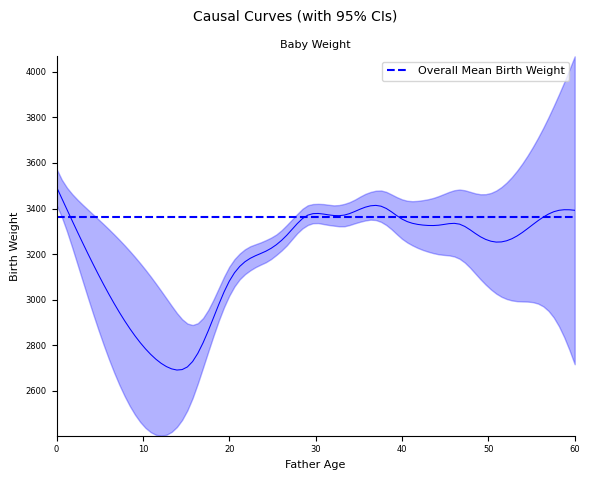

In [76]:
# Calculando o peso médio do bebê em toda a amostra
overall_mean_weight = df['bweight'].mean()

# Restante do código para plotar as curvas causais
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [6, 5]

fig, ax = plt.subplots(1, 1)

# Plotting quantities
treat = results_dict[result_class[0]]['Treatment']
mean = results_dict[result_class[0]]['Causal_Dose_Response']
lb = results_dict[result_class[0]]['Lower_CI']
ub = results_dict[result_class[0]]['Upper_CI']
plot_mean_and_CI(ax, treat, mean, lb, ub, color_mean='b', color_shading='b')

# Labels
ax.set_ylabel('Birth Weight', fontsize=8)
ax.set_xlabel('Father Age', fontsize=8)
ax.set_title(result_name[0], fontsize=8)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim(treat.min(), treat.max())
ax.set_ylim(min(lb), max(ub))
ax.tick_params(axis='both', which='major', labelsize=6)

# Adicionando a linha do peso médio do bebê ao gráfico
ax.axhline(y=overall_mean_weight, color='b', linestyle='--', label='Overall Mean Birth Weight')

# Adicionando a legenda ao gráfico
ax.legend(fontsize=8)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Causal Curves (with 95% CIs)", fontsize=10)
fig.savefig('test_causal_curves.png', bbox_inches='tight', dpi=200)
plt.show()


**Também é possivel ver efeitos de mediação**

Replique o exemplo contido em :

https://github.com/ronikobrosly/causal-curve/blob/main/examples/NHANES_BLL_example.ipynb

A ideia do exemplo é analisar o impacto causal da redução dos níveis de chumbo no sangue em crianças no desempenho e nos escores cognitivos.

A literatura de Propensity Score com tratamento contínuo é recente. 

Outro pacote recente é o:

!pip install pycausalgps


**Causal Inference with Generalized Propensity Score**


É importante instalar o pacote do R antes de instalar o pacote do Python, porque o pacote do Python depende do pacote do R [install.packages("CausalGPS", dependencies = TRUE)].

No R esse mesmo pacote é chamado de **CausalGPS**.

